# Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sharda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.shape

(42, 2)

In [5]:
# We will extract Quarter values and Year values separately from 'Quarter column'
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]

C:\Users\Sharda\AppData\Local\Temp/ipykernel_30580/361108268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i]= p[0:2]
C:\Users\Sharda\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Sharda\AppData\Local\Temp/ipykernel_30580/361108268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][i]= p[3

In [6]:
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [7]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


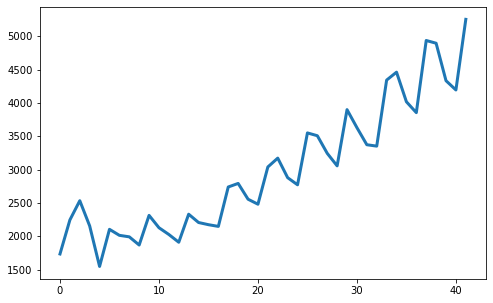

In [8]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(df['Sales'], linewidth=3)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

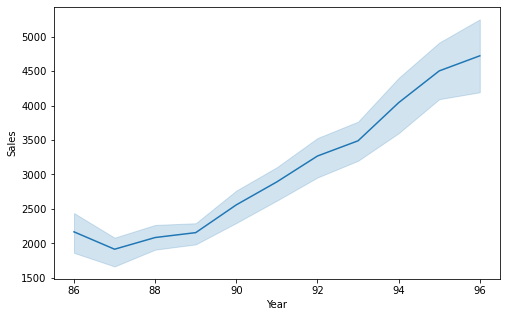

In [9]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=df)

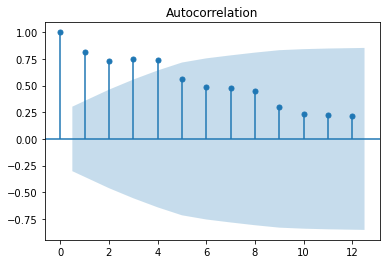

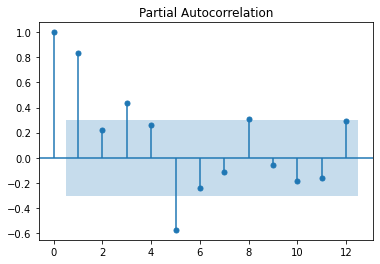

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

In [11]:
# Data Driven Forecasting Methods

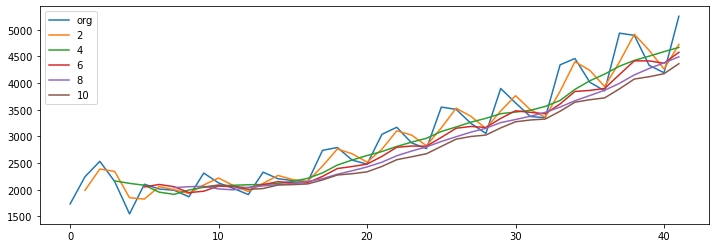

In [12]:
# Moving Average Method
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,12,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

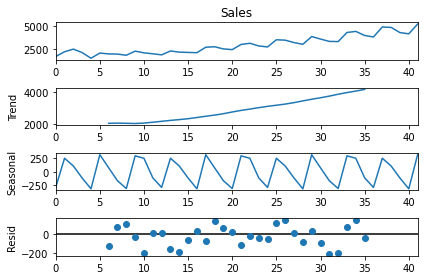

In [13]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [14]:
# Evaluation Metric RMSE
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [15]:
# Model based Forecasting Methods
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [16]:
# Splitting data into Train and Test
Train = df.head(38)
Test = df.tail(4)

In [17]:
# Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test['Sales'], pred_linear)
rmse_linear

591.553295722396

In [18]:
# Exponential Model
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_exp

466.2479731067161

In [19]:
# Quadratic Model
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad = RMSE(Test['Sales'], pred_Quad)
rmse_quad

475.5618351831504

In [20]:
# Additive Seasonality model
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1860.0238154547274

In [25]:
# Additive seasonality with linear trend
add_sea_lin = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmse_add_sea_lin = RMSE(Test['Sales'], pred_add_sea_lin)
rmse_add_sea_lin 

464.98290239822575

In [21]:
# Additive Seasonality Quadratic model
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad 

301.7380071934581

In [22]:
# Multiplicative Seasonality model
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1963.3896400779743

In [23]:
# Multiplicative seasonality with quadratic trend
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea .predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_Mul_add_sea = RMSE(Test['Sales'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

225.52439049827785

In [27]:
list = [['Linear Mode',rmse_linear], ['Exp model',rmse_exp],
        ['Quad model',rmse_quad], ['add seasonality',rmse_add_sea],
        ['Linear add seasonality',rmse_add_sea_lin], ['Quad add seasonality',rmse_add_sea_quad],
        ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_add_sea]]

In [28]:
data= pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
data

,Model,RMSE_Value
0,Linear Mode,591.553296
1,Exp model,466.247973
2,Quad model,475.561835
3,add seasonality,1860.023815
4,Linear add seasonality,464.982902
5,Quad add seasonality,301.738007
6,Mult Seasonality,1963.389640
7,Mult add seasonality,225.524390


In [29]:
# Building final model with least RMSE value

In [30]:
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [31]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=df).fit()
pred_final = pd.Series(final_model.predict(df[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_final_model = RMSE(df['Sales'], pred_final)
rmse_final_model

159.0552257652248

In [33]:
pred_df = pd.DataFrame({'Actual' : df.Sales, 'Predicted' : pred_final})
pred_df.head()

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
